<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/Calidad_y_preprocesado_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación de datos incompletos

Almacenar un conjunto de muestras con algunos rasgos incompletos.

In [ ]:
import pandas as pd
from io import StringIO
datos_csv = \
'''Altura,Longitud,Potencia
,4000,
1400,4200,120
,4200,100
1650,3800,120
1500,4100,90
1400,3900,110
'''
# Si usas Python 2.7, debes convertir la cadena a unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(datos_csv))
df

,Altura,Longitud,Potencia
0,NaN,4000,NaN
1,1400.0,4200,120.0
2,NaN,4200,100.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


In [ ]:
df.isnull().sum()

,0
Altura,2
Longitud,0
Potencia,1


Accediendo a los valores:

In [ ]:
df.values

array([[  nan, 4000.,   nan],
       [1400., 4200.,  120.],
       [  nan, 4200.,  100.],
       [1650., 3800.,  120.],
       [1500., 4100.,   90.],
       [1400., 3900.,  110.]])

Accediendo al nombre de los rasgos:

In [ ]:
df.columns

Index(['Altura', 'Longitud', 'Potencia'], dtype='object')

# Eliminar datos incompletos

Eliminando muestras incompletas

In [ ]:
df.dropna(axis=0)

,Altura,Longitud,Potencia
1,1400.0,4200,120.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


Eliminando rasgos incompletos

In [ ]:
df.dropna(axis=1)

,Longitud
0,4000
1,4200
2,4200
3,3800
4,4100
5,3900


Eliminar muestras con menos de dos rasgos:

In [ ]:
df.dropna(thresh=2)

,Altura,Longitud,Potencia
1,1400.0,4200,120.0
2,NaN,4200,100.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


Eliminar aquellas muestras cuyo rasgo "Potencia" esté vacío:

In [ ]:
df.dropna(subset=['Potencia'])

,Altura,Longitud,Potencia
1,1400.0,4200,120.0
2,NaN,4200,100.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


Eliminar muestras que no tengan ningún rasgo (ninguna en nuestro ejemplo):

In [ ]:
df.dropna(how='all')

,Altura,Longitud,Potencia
0,NaN,4000,NaN
1,1400.0,4200,120.0
2,NaN,4200,100.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


# Rellenar datos incompletos

Usando la **media**:

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

completador = SimpleImputer(missing_values=np.nan, strategy='mean')
completador = completador.fit(df.values)
datos_completos = completador.transform(df.values)
datos_completos

array([[1487.5, 4000. ,  108. ],
       [1400. , 4200. ,  120. ],
       [1487.5, 4200. ,  100. ],
       [1650. , 3800. ,  120. ],
       [1500. , 4100. ,   90. ],
       [1400. , 3900. ,  110. ]])

Rellenando con **otro método**, pero esta vez usando la **mediana**:

In [ ]:
df.fillna(df.median())

,Altura,Longitud,Potencia
0,1450.0,4000,110.0
1,1400.0,4200,120.0
2,1450.0,4200,100.0
3,1650.0,3800,120.0
4,1500.0,4100,90.0
5,1400.0,3900,110.0


Usando la **moda**:

In [ ]:
completador = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
completador = completador.fit(df.values)

datos_completos = completador.transform(df.values)
datos_completos

array([[1400., 4000.,  120.],
       [1400., 4200.,  120.],
       [1400., 4200.,  100.],
       [1650., 3800.,  120.],
       [1500., 4100.,   90.],
       [1400., 3900.,  110.]])

# Uso de rasgos ordinales

In [ ]:
import pandas as pd
vehiculosDF = pd.DataFrame([
           ['azul', 'B', 100, 'clase1'],
           ['blanco', 'A', 100, 'clase1'],
           ['negro', 'B', 120, 'clase2'],
           ['verde', 'C', 120, 'clase1'],
           ['rojo', 'D', 140, 'clase2']])
vehiculosDF.columns = ['Color', 'Segmento', 'Potencia', 'ClaseDeseada']
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,B,100,clase1
1,blanco,A,100,clase1
2,negro,B,120,clase2
3,verde,C,120,clase1
4,rojo,D,140,clase2


In [ ]:
# Creamos diccionario para el mapeo
mapeo_segmento = {'A': 1,
                'B': 2,
                'C': 3,
                'D': 4}
vehiculosDF['Segmento'] = vehiculosDF['Segmento'].map(mapeo_segmento)
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,2,100,clase1
1,blanco,1,100,clase1
2,negro,2,120,clase2
3,verde,3,120,clase1
4,rojo,4,140,clase2


In [ ]:
# Realizamos el diccionario a la inversa
mapeo_segmento_inverso = {numRasgo: idRasgo for idRasgo, numRasgo in
                          mapeo_segmento.items()}
vehiculosDF['Segmento'].map(mapeo_segmento_inverso)

,Segmento
0,B
1,A
2,B
3,C
4,D


# Codificación de clase deseada

Creando diccionario para mapeo:

In [ ]:
import numpy as np
mapeo_clase = {etiqueta: idx for idx, etiqueta in
                  enumerate(np.unique(vehiculosDF['ClaseDeseada']))}
mapeo_clase

{'clase1': 0, 'clase2': 1}

In [ ]:
vehiculosDF['ClaseDeseada'] = vehiculosDF['ClaseDeseada'].map(mapeo_clase)
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,2,100,0
1,blanco,1,100,0
2,negro,2,120,1
3,verde,3,120,0
4,rojo,4,140,1


Deshacemos el mapeo (mapeo inverso):

In [ ]:
mapeo_clase_inverso = {numClase: idClase for idClase, numClase in
                       mapeo_clase.items()}
vehiculosDF['ClaseDeseada']=vehiculosDF['ClaseDeseada'].map(mapeo_clase_inverso)
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,2,100,clase1
1,blanco,1,100,clase1
2,negro,2,120,clase2
3,verde,3,120,clase1
4,rojo,4,140,clase2


Mapeando clase deseada mediante scikit-learn:

In [ ]:
from sklearn.preprocessing import LabelEncoder
mapeador_clase = LabelEncoder()
y = mapeador_clase.fit_transform(vehiculosDF['ClaseDeseada'].values)
y

array([0, 0, 1, 0, 1])

In [ ]:
vehiculosDF['ClaseDeseada'] = mapeador_clase.fit_transform(vehiculosDF['ClaseDeseada'].values)
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,2,100,0
1,blanco,1,100,0
2,negro,2,120,1
3,verde,3,120,0
4,rojo,4,140,1


Mapeo inverso:

In [ ]:
mapeador_clase.inverse_transform(y)

array(['clase1', 'clase1', 'clase2', 'clase1', 'clase2'], dtype=object)

In [ ]:
vehiculosDF['ClaseDeseada'] = mapeador_clase.inverse_transform(y)
vehiculosDF

,Color,Segmento,Potencia,ClaseDeseada
0,azul,2,100,clase1
1,blanco,1,100,clase1
2,negro,2,120,clase2
3,verde,3,120,clase1
4,rojo,4,140,clase2


# Uso de rasgos no ordinales

Vamos a transformar los colores. Con lo que hemos visto hasta ahora podríamos realizar un mapeo como si fueran valores ordinales:

In [ ]:
X = vehiculosDF[['Color', 'Segmento', 'Potencia']].values

mapeador_color = LabelEncoder()
X[:, 0] = mapeador_color.fit_transform(X[:, 0])
X

array([[0, 2, 100],
       [1, 1, 100],
       [2, 2, 120],
       [4, 3, 120],
       [3, 4, 140]], dtype=object)

Como hemos dicho en la teoría, no tiene sentido hacer una mapeo de colores a valores ordinales, en este caso es mejor realizar una asignación del tipo **one-hot**:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = vehiculosDF[['Color', 'Segmento', 'Potencia']].values

mapeadorOH_color = OneHotEncoder()
mapeadorOH_color.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

Podemos transformar directamente la columna que queramos en una matriz de valores mediante **scikit-learn** y dejar inalteradas el resto:

In [ ]:
from sklearn.compose import ColumnTransformer
X = vehiculosDF[['Color', 'Segmento', 'Potencia']].values

transformador_col = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
transformador_col.fit_transform(X).astype(float)

array([[  1.,   0.,   0.,   0.,   0.,   2., 100.],
       [  0.,   1.,   0.,   0.,   0.,   1., 100.],
       [  0.,   0.,   1.,   0.,   0.,   2., 120.],
       [  0.,   0.,   0.,   0.,   1.,   3., 120.],
       [  0.,   0.,   0.,   1.,   0.,   4., 140.]])

**Pandas** también dispone de un método que transforma directamente todas las **cadenas de texto a vectores de rasgos**:

In [ ]:
pd.get_dummies(vehiculosDF[['Color', 'Segmento', 'Potencia']])

,Segmento,Potencia,Color_azul,Color_blanco,Color_negro,Color_rojo,Color_verde
0,2,100,True,False,False,False,False
1,1,100,False,True,False,False,False
2,2,120,False,False,True,False,False
3,3,120,False,False,False,False,True
4,4,140,False,False,False,True,False


Usar **Pandas** para eliminar la columna Color_azul para **reducir la correlación** entre rasgos sin perder precisión:

In [ ]:
pd.get_dummies(vehiculosDF[['Color', 'Segmento', 'Potencia']],
               drop_first=True)

,Segmento,Potencia,Color_blanco,Color_negro,Color_rojo,Color_verde
0,2,100,False,False,False,False
1,1,100,True,False,False,False
2,2,120,False,True,False,False
3,3,120,False,False,False,True
4,4,140,False,False,True,False


**Forzando** a que aplique mapeo one-hot en una columna, aunque no sea de tipo cadena:

In [ ]:
pd.get_dummies(vehiculosDF[['Color', 'Segmento', 'Potencia']],
               drop_first=True,columns=['Potencia'])

,Color,Segmento,Potencia_120,Potencia_140
0,azul,2,False,False
1,blanco,1,False,False
2,negro,2,True,False
3,verde,3,True,False
4,rojo,4,False,True


...usando **scikit-learn**:

In [ ]:
mapeadorOH_color = OneHotEncoder(categories='auto', drop='first')

mapeadorOH_color.fit_transform(X[:, 0].reshape(-1, 1)).toarray()
transformador_col = ColumnTransformer([
           ('onehot', mapeadorOH_color, [0]),
           ('nothing', 'passthrough', [1, 2])])

transformador_col.fit_transform(X).astype(float)

array([[  0.,   0.,   0.,   0.,   2., 100.],
       [  1.,   0.,   0.,   0.,   1., 100.],
       [  0.,   1.,   0.,   0.,   2., 120.],
       [  0.,   0.,   0.,   1.,   3., 120.],
       [  0.,   0.,   1.,   0.,   4., 140.]])

# Dividir en conjunto de entrenamiento y test

Podemos carga nuestro propio conjunto de datos local en formato csv mediante el siguiente código:

In [ ]:
# df = pd.read_csv(
#    'ruta/local/a/conjuntoDatos.data', header=None)

En la siguiente página web podemos encontrar diferentes repositorios para practicar:

https://archive.ics.uci.edu/ml/machine-learning-databases/

In [ ]:
df_corazon = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/heart-disease/processed.cleveland.data',
    header=None)
df_corazon.columns = ['Edad','Sexo','Dolor_pecho', 'Tensión','Colesterol',
                      'Azúcar', 'Electro', 'Tejercicio', 'Exang', 'STdepres',
                      'Pendiente', 'Num_vasos', 'Thal', 'num_Deseado']
print('Clases deseadas:', np.unique(df_corazon['num_Deseado']))

Clases deseadas: [0 1 2 3 4]


In [ ]:
df_corazon

,Edad,Sexo,Dolor_pecho,Tensión,Colesterol,Azúcar,Electro,Tejercicio,Exang,STdepres,Pendiente,Num_vasos,Thal,num_Deseado
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Como vemos en la muestra 302, en este repositorio existen **valores desconocidos**  etiquetados con el carácter **'?'**. Primero marcaremos ese carácter como NaN y luego aplicaremos la estrategia de eliminar las filas con valores incompletos como ya hemos visto previamente.

In [ ]:
df_corazon=df_corazon.replace(['?'], np.nan).dropna(axis=0)
df_corazon

,Edad,Sexo,Dolor_pecho,Tensión,Colesterol,Azúcar,Electro,Tejercicio,Exang,STdepres,Pendiente,Num_vasos,Thal,num_Deseado
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Vamos a codificar los **rasgos no ordinales**:

In [ ]:
df_corazon=pd.get_dummies(df_corazon[df_corazon.columns], drop_first=True,
               columns=['Dolor_pecho', 'Electro', 'Pendiente', 'Thal'])
df_corazon

,Edad,Sexo,Tensión,Colesterol,Azúcar,Tejercicio,Exang,STdepres,Num_vasos,num_Deseado,Dolor_pecho_2.0,Dolor_pecho_3.0,Dolor_pecho_4.0,Electro_1.0,Electro_2.0,Pendiente_2.0,Pendiente_3.0,Thal_6.0,Thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,False,False,True,False,False,True,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,False,False,False,False,False,True,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,2,False,False,True,False,False,True,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,3,False,False,True,False,False,True,False,False,True


Obtenemos la nueva lista de rasgos:

In [ ]:
etiquetas_rasgos = np.concatenate((df_corazon.iloc[:, 0:9].columns,
                    df_corazon.iloc[:, 10:].columns))
etiquetas_rasgos

array(['Edad', 'Sexo', 'Tensión', 'Colesterol', 'Azúcar', 'Tejercicio',
       'Exang', 'STdepres', 'Num_vasos', 'Dolor_pecho_2.0',
       'Dolor_pecho_3.0', 'Dolor_pecho_4.0', 'Electro_1.0', 'Electro_2.0',
       'Pendiente_2.0', 'Pendiente_3.0', 'Thal_6.0', 'Thal_7.0'],
      dtype=object)

Creamos los subconjuntos de **test** y de **entrenamiento**:

In [ ]:
from sklearn.model_selection import train_test_split

X = np.concatenate((df_corazon.iloc[:, 0:9].values,
                    df_corazon.iloc[:, 10:].values), axis=1)
y = df_corazon.loc[:, 'num_Deseado'].values
X_ent, X_test, y_ent, y_test =\
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=10,
                     stratify=y)

# Escalado de rasgos

Escalado aplicando directamente las definiciones:

In [ ]:
ex = np.array([20, 40, 42, 47, 3000])
print('Original:', ex)
print('Normalizado:', (ex - ex.min()) / (ex.max() - ex.min()))
print('Estandarizado:', (ex - ex.mean()) / ex.std())

Original: [  20   40   42   47 3000]
Normalizado: [0.         0.00671141 0.00738255 0.0090604  1.        ]
Estandarizado: [-0.51454025 -0.49766454 -0.49597697 -0.49175804  1.9999398 ]


Estandarización **robusta**:

In [ ]:
ex1er3erCuartil = np.array([40, 42, 47]) #Cogemos desde el 1er al 3er cuartil
mediana = 42
print((ex - mediana) / (ex1er3erCuartil[-1]-ex1er3erCuartil[0]))

[-3.14285714e+00 -2.85714286e-01  0.00000000e+00  7.14285714e-01
  4.22571429e+02]


Usando directamente la biblioteca **scikit-learn**:

In [ ]:
from sklearn.preprocessing import RobustScaler
escaladorRobusto = RobustScaler()
escaladorRobusto.fit_transform(ex.reshape(-1, 1))

array([[-3.14285714e+00],
       [-2.85714286e-01],
       [ 0.00000000e+00],
       [ 7.14285714e-01],
       [ 4.22571429e+02]])

Usando directamente la biblioteca **scikit-learn** para nuestro conjunto de muestras:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escaladorMinMax = MinMaxScaler()
X_ent_norm = escaladorMinMax.fit_transform(X_ent)
X_test_norm = escaladorMinMax.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
escaladorEstandar = StandardScaler()
X_ent_std = escaladorEstandar.fit_transform(X_ent)
X_test_std = escaladorEstandar.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
escaladorRobusto = RobustScaler()
X_ent_rob = escaladorRobusto.fit_transform(X_ent)
X_test_rob = escaladorRobusto.transform(X_test)

Visualización del escalado mediante **histogramas**:

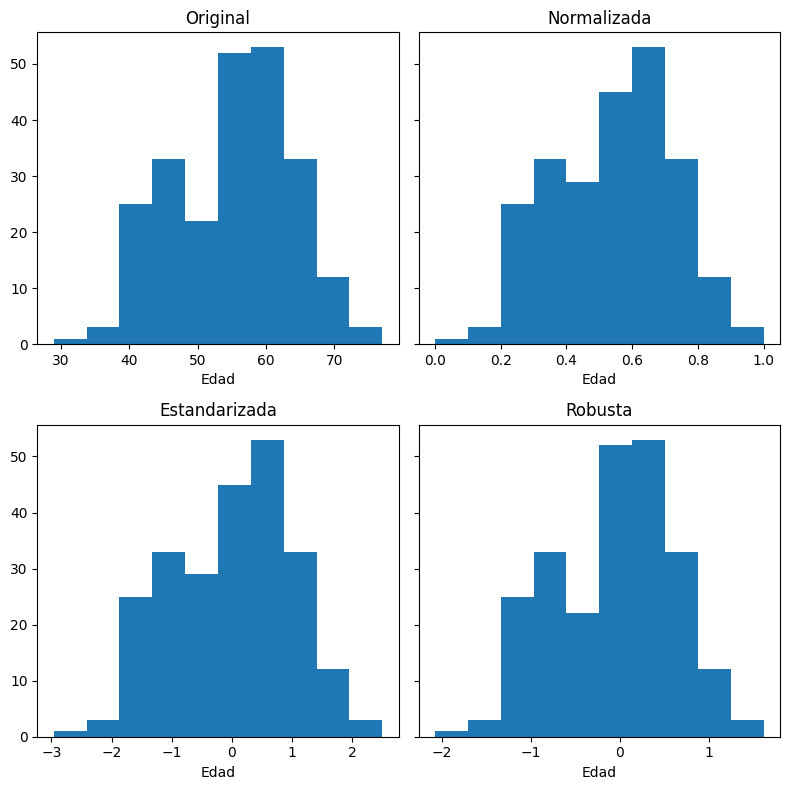

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, sharey=True, tight_layout=True,figsize=(8, 8))

dist0 = X_ent[:,0]
dist1 = X_ent_norm[:,0]
dist2 = X_ent_std[:,0]
dist3 = X_ent_rob[:,0]

ax[0,0].hist(dist0)
ax[0,0].set_xlabel('Edad')
ax[0,0].set_title('Original')
ax[0,1].hist(dist1)
ax[0,1].set_xlabel('Edad')
ax[0,1].set_title('Normalizada')
ax[1,0].hist(dist2)
ax[1,0].set_xlabel('Edad')
ax[1,0].set_title('Estandarizada')
ax[1,1].hist(dist3)
ax[1,1].set_xlabel('Edad')
ax[1,1].set_title('Robusta')
plt.show()

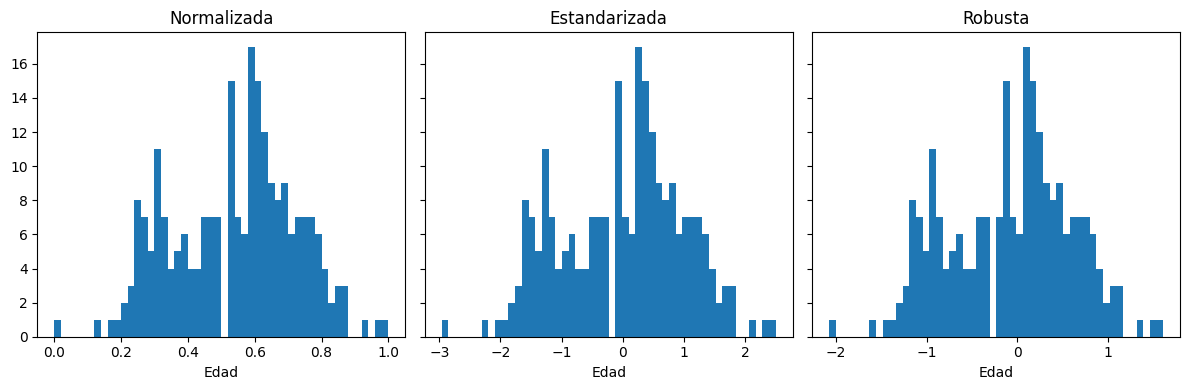

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(12, 4))

dist1 = X_ent_norm[:,0]
dist2 = X_ent_std[:,0]
dist3 = X_ent_rob[:,0]

# Por defecto son 10 cubos, pero podemos forzar a usar un número de cubos
# para agrupar los datos en el histograma
n_cubos = 50

ax[0].hist(dist1, bins=n_cubos)
ax[0].set_xlabel('Edad')
ax[0].set_title('Normalizada')
ax[1].hist(dist2, bins=n_cubos)
ax[1].set_xlabel('Edad')
ax[1].set_title('Estandarizada')
ax[2].hist(dist3, bins=n_cubos)
ax[2].set_xlabel('Edad')
ax[2].set_title('Robusta')
plt.show()

**Histogramas 2D**:

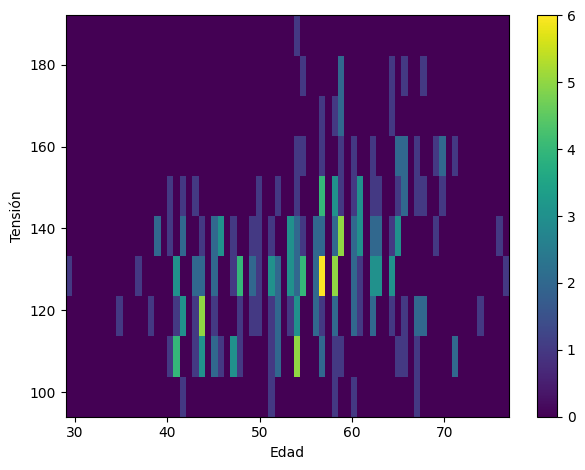

In [ ]:
fig, ax = plt.subplots(tight_layout=True)

# Es posible ajustar el número de cubos en cada dimensión
h=ax.hist2d(X_ent[:,0], X_ent[:,2], bins=(70,10))
ax.set_xlabel('Edad')
ax.set_ylabel('Tensión')

# Dibujamos la legenda:
fig.colorbar(h[3], ax=ax)

plt.show()

Para ver el efecto de la normalización, vamos a dibujar el mismo rango de valores en cada eje:

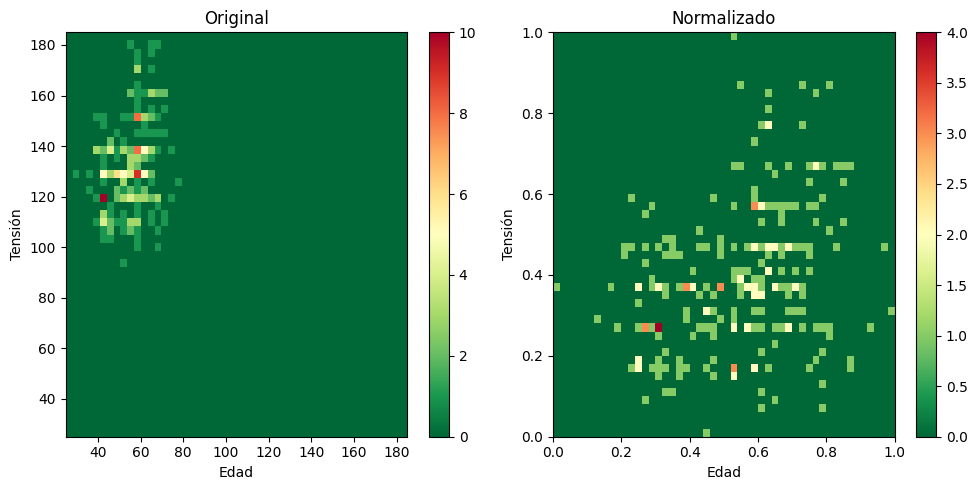

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

# Ajustamos el rango de valores de cada eje a [0, 200] y vamos usar otro mapa
# de colores, el RdYlGn_r
h1 = ax[0].hist2d(X_ent[:,0], X_ent[:,2], range=[[25, 185], [25, 185]], bins=50,
             cmap = "RdYlGn_r")
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Tensión')
ax[0].set_title('Original')
fig.colorbar(h1[3], ax=ax[0])
h2 = ax[1].hist2d(X_ent_norm[:,0], X_ent_norm[:,2], bins=50, cmap = "RdYlGn_r")
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Tensión')
ax[1].set_title('Normalizado')
fig.colorbar(h2[3], ax=ax[1])
plt.show()

# Selección de rasgos significativos con métodos basados en el descenso por el gradiente

Vamos a clasificar las muestras utilizando **regresión logística** con un enfoque OvR:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = OneVsRestClassifier(LogisticRegression(penalty='l1',
                         C=1,
                         solver='liblinear'))
# Es posible aumentar o decrementar C para ajustar el efecto
# de la regularización
lr.fit(X_ent_std, y_ent)

print('Exactitud en entrenamiento:', lr.score(X_ent_std, y_ent))
print('Exactitud en test:', lr.score(X_test_std, y_test))

Exactitud en entrenamiento: 0.6371308016877637
Exactitud en test: 0.6166666666666667


Mostramos los vectores de **pesos** de las cinco neuronas (recordad enfoque OvR):

In [ ]:
# Enumeramos los estimadores (neuronas) y mostramos sus pesos asociados
for i, estimador in enumerate(lr.estimators_):
    print(f"Neurona {i}:\n", np.abs(estimador.coef_))

Neurona 0:
 [[0.         0.4920198  0.23427814 0.         0.15804984 0.1527468
  0.36794086 0.24467525 1.02729996 0.2240323  0.26326329 0.63965993
  0.13126328 0.35391923 0.47004728 0.18521605 0.00398857 0.69560158]]
Neurona 1:
 [[0.20998091 0.26879987 0.12300386 0.10540223 0.42658517 0.00258358
  0.00636916 0.39697081 0.         0.07817824 0.19402855 0.
  0.15584359 0.12932556 0.16394146 0.         0.         0.3154043 ]]
Neurona 2:
 [[0.11082612 0.41025044 0.02667084 0.24191044 0.29005945 0.
  0.20839974 0.36038282 0.09859436 0.         0.26518389 0.63866989
  0.         0.17223062 0.09904405 0.02917378 0.31808984 0.17778883]]
Neurona 3:
 [[0.1840235  0.         0.         0.10634728 0.08034548 0.403751
  0.42487761 0.18796577 0.53692533 0.18764229 0.         0.0646117
  0.15074696 0.39805484 0.09693797 0.07635744 0.45266323 0.51997502]]
Neurona 4:
 [[0.19668219 0.21389719 0.15593791 0.         0.0653474  0.09489476
  0.11955638 0.2946195  0.64567038 0.14398801 0.41323787 0.04625313


Creamos un código que entrena neuronas logísticas **regularizadas L1** con **diferentes valores de C** y dibuja el valor medio de las componentes de pesos sinápticos en función de dichos valores de C:

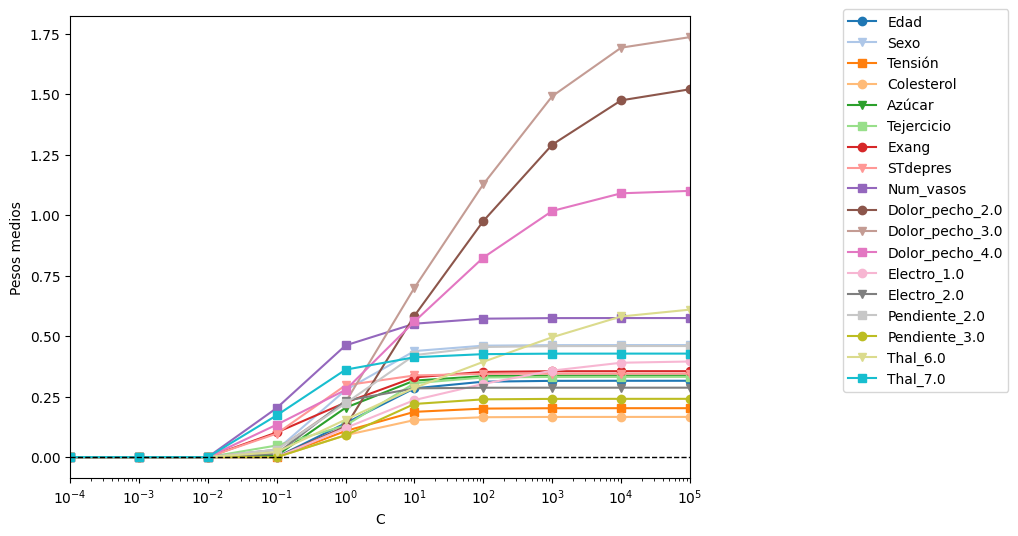

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Definir listas para almacenar valores de regularización y pesos
paramRegularizacion, pesos = [], []

# Bucle sobre diferentes valores de regularización
for exponenteC in np.arange(-4., 6.):
    coeficiente = 10.**exponenteC
    lr = OneVsRestClassifier(LogisticRegression(penalty='l1', C=coeficiente,
                                                solver='liblinear',
                                                random_state=10))
    # Entrenar el modelo
    lr.fit(X_ent_std, y_ent)

    # Extraemos los vectores de pesos de todas las neuronas
    # (valores absolutos, el signo es indiferente para conocer su
    # significatividad)
    pesos_neuronas = []
    for estimador in lr.estimators_:
        pesos_neuronas.append(np.abs(estimador.coef_))

    # Calculamos los vectores de pesos absolutos medios entre las neuronas
    pesos.append(np.mean(pesos_neuronas, axis=0).flatten())
    paramRegularizacion.append(coeficiente)

# Convertir lista de pesos a un array numpy
pesos = np.array(pesos)

# Dibujando los resultados
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

# Estilos y colores para las líneas de la gráfica
marcadoresLineas = ['o', 'v', 's']
colores = plt.get_cmap('tab20')(np.linspace(0, 1, len(etiquetas_rasgos),
                                            endpoint=False))

# Dibujamos la curva de cada componente del vector de pesos en función de C
idxMarcador = 0
for componentePeso, color in zip(range(pesos.shape[1]), colores):
    plt.plot(paramRegularizacion, pesos[:, componentePeso],
             label=etiquetas_rasgos[componentePeso],
             color=color, marker=marcadoresLineas[idxMarcador])
    idxMarcador = (idxMarcador + 1) % len(marcadoresLineas)

# Dibujamos el eje horizontal
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlim([10**(-4), 10**5])
plt.ylabel('Pesos medios')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

Vamos a imprimir los vectores de pesos resultantes de aplicar una regularización L1 con coeficiente C=0.1 en el que según la gráfica, muchas de las componentes de los vectores de pesos deberían ser nulas o casi nulas.

In [ ]:
lr = OneVsRestClassifier(LogisticRegression(penalty='l1',
                         C=0.1,
                         solver='liblinear'))
lr.fit(X_ent_std, y_ent)

# Imprimimos el identificador de la neurona y sus pesos asociados
for i, estimador in enumerate(lr.estimators_):
    print(f"Neurona {i}:\n", np.abs(estimador.coef_))

Neurona 0:
 [[0.         0.13599617 0.         0.         0.         0.0963986
  0.24802972 0.21310505 0.6098538  0.         0.1542191  0.37660401
  0.         0.06767626 0.15522403 0.         0.         0.5259721 ]]
Neurona 1:
 [[0.         0.01553604 0.         0.         0.03214071 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.10656281]]
Neurona 2:
 [[0.         0.         0.         0.         0.         0.
  0.09672142 0.16065892 0.03977708 0.         0.         0.29394605
  0.         0.         0.         0.         0.10367662 0.        ]]
Neurona 3:
 [[0.         0.         0.         0.         0.         0.14395919
  0.16510936 0.06629756 0.21063977 0.         0.         0.
  0.         0.         0.         0.         0.         0.2309374 ]]
Neurona 4:
 [[0.         0.         0.         0.         0.         0.
  0.         0.0459317  0.15382365 0.         0.         0.
  0.         0.         0.   

Efectivamente, la componente 0 (edad), la 2(tensión) o la 3 (colesterol) entre otras se hacen nulas frente a un coeficiente de regularización C=0.1. Véamos por ejemplo los coeficientes asociados al colesterol (componente 3):



In [ ]:
idx_peso = 3 #Índice del peso asociado al colesterol
for i, estimador in enumerate(lr.estimators_):
    print(f"Neurona {i}, peso {idx_peso}:\n", np.abs(estimador.coef_[0, idx_peso]))

Neurona 0, peso 3:
 0.0
Neurona 1, peso 3:
 0.0
Neurona 2, peso 3:
 0.0
Neurona 3, peso 3:
 0.0
Neurona 4, peso 3:
 0.0


¿Quiere decir esto que el rendimiento va a ser igual cuando no regularizamos que cuando usamos una regularización que de facto "ignora" a estas componentes menos significativas?:

In [ ]:
print('Exactitud en entrenamiento:', lr.score(X_ent_std, y_ent))
print('Exactitud en test:', lr.score(X_test_std, y_test))

Exactitud en entrenamiento: 0.6118143459915611
Exactitud en test: 0.6


Como vemos, empeora en entrenamiento y en test. Esto es lo habitual, ahora usa menos rasgos para realizar el ajuste, por lo que es probable que no pueda modelar con tanto detalle las muestras de entrenamiento.

# Selección secuencial de rasgos significativos

Ahora vamos a crear un código que realice una selección secuencial de los rasgos (**SBS**). Utilizaremos cualquier tipo de estimador. A diferencia de la sección anterior, vamos a utilizar el **rendimento en el conjunto de test** como medida de lo bueno que es un rasgo.

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimador, l_rasgos_obj,
                 scoring=accuracy_score):
        self.scoring = scoring
        self.estimador = clone(estimador)
        self.l_rasgos_obj = l_rasgos_obj

    def ajustar(self, X_ent, X_test, y_ent, y_test):
        # Contador de cantidad de rasgos actuales:
        k_rasgos_act = X_ent.shape[1]
        # Vector con los índices de los rasgos actuales:
        self.indices_ = tuple(range(k_rasgos_act))
        # Lista con los subconjuntos de rasgos elegidos para cada cantidad de
        # rasgos: mejores con l rasgos, con l-1, con l-2, etc:
        self.subconjuntos_ = [self.indices_]
        # Cálculo del rendimiento con el conjunto inicial de rasgos:
        rendimiento = self._calcular_rendimiento(X_ent, y_ent,
                                 X_test, y_test, self.indices_)
        # Almacenamos rendimiento inicial en la lista de rendimientos:
        self.rendimientos_ = [rendimiento]
        while k_rasgos_act > self.l_rasgos_obj:
            # Inciamos a vacío las listas de subconjuntos de rasgos con sus
            # rendimientos asociados:
            lista_rend_p = []
            subconjuntos_p = []

            # Probamos todas las combinaciones con 1 rasgo menos de los actuales
            for p in combinations(self.indices_, r=k_rasgos_act - 1):
                rendimiento_p = self._calcular_rendimiento(X_ent, y_ent,
                                         X_test, y_test, p)
                lista_rend_p.append(rendimiento_p)
                subconjuntos_p.append(p)

            # Determinarmos cuál ha sido el mejor subconjunto de rasgos:
            mejor_p = np.argmax(lista_rend_p)

            # Anotamos como mejor para esta cantidad de rasgos a mejor_p:
            self.indices_ = subconjuntos_p[mejor_p]
            self.subconjuntos_.append(self.indices_)
            self.rendimientos_.append(lista_rend_p[mejor_p])
            k_rasgos_act -= 1

        return self

    # Calcula el rendimiento de test del estimador utilizando únicamente
    # los rasgos marcados/definidos en el vector "indices"
    def _calcular_rendimiento(self, X_ent, y_train, X_test, y_test, indices):
        self.estimador.fit(X_ent[:, indices], y_train)
        y_pred = self.estimador.predict(X_test[:, indices])
        rendimiento = self.scoring(y_test, y_pred)
        return rendimiento

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, l_rasgos_obj=1)
sbs.ajustar(X_ent_std, X_test_std, y_ent, y_test)

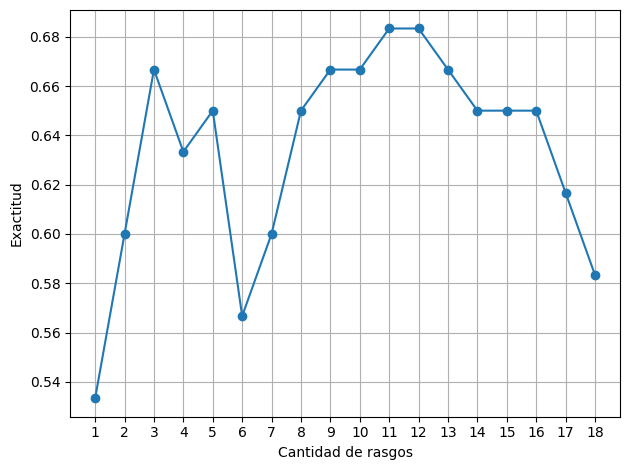

In [ ]:
cantidadRasgos = [len(subconj) for subconj in sbs.subconjuntos_]
plt.plot(cantidadRasgos, sbs.rendimientos_, marker='o')
plt.xticks(np.arange(1,19))
plt.ylabel('Exactitud')
plt.xlabel('Cantidad de rasgos')
plt.grid()
plt.tight_layout()
plt.show()

Nótese que el rendimiento en KNN mejora al reducir el número de rasgos. Esto es algo frecuente en este tipo de modelos. Es lo que se denomina la **maldición de la dimensión**: a veces dos vecinos que realmente son cercanos, al utilizar muchas dimensiones, acaban estando separados, por lo que los modelos que se basan en medir la distancia entre muestras, determinan erróneamente que pertenecen a clases distintas.

Vamos a ver cuál es el **mejor subconjunto de rasgos**, como vemos en la gráfica, es aquel con 11 o 12 rasgos, es decir, la posición 6 o 7 respectivamente de la lista sbs.subconjuntos_

In [ ]:
indMejoresRasgos7 = list(sbs.subconjuntos_[7])
print(etiquetas_rasgos[indMejoresRasgos7])

['Edad' 'Sexo' 'Tensión' 'Colesterol' 'Azúcar' 'Tejercicio' 'STdepres'
 'Num_vasos' 'Dolor_pecho_2.0' 'Dolor_pecho_3.0' 'Thal_7.0']


¿Será dicho subconjunto el que mejor rendimiento obtiene si distribuimos el conjunto de test y entranamiento de otra manera? Vamos a probar a **redistribuir las muestras de entrenamiento y test**:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Elegimos otra distribución mediante otra semilla aleatoria:
X_ent_v2, X_test_v2, y_ent_v2, y_test_v2 =\
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=15,
                     stratify=y)

# Escalamos:
escaladorEstandar = StandardScaler()
X_ent_v2_std = escaladorEstandar.fit_transform(X_ent_v2)
X_test_v2_std = escaladorEstandar.transform(X_test_v2)

Probemos con el **conjunto de rasgos completo** con el nuevo conjunto de muestras de entrenamiento y test:

In [ ]:
knn.fit(X_ent_v2_std, y_ent_v2)
print('Exactitud en entrenamiento:',
      knn.score(X_ent_v2_std, y_ent_v2))
print('Exactitud en test:',
      knn.score(X_test_v2_std, y_test_v2))

Exactitud en entrenamiento: 0.6877637130801688
Exactitud en test: 0.6


Ahora **probemos el subconjunto rasgos** que se supone que logra mejores resultados:

In [ ]:
knn.fit(X_ent_v2_std[:, indMejoresRasgos7], y_ent_v2)
print('Exactitud en entrenamiento:',
      knn.score(X_ent_v2_std[:, indMejoresRasgos7], y_ent_v2))
print('Exactitud en test:',
      knn.score(X_test_v2_std[:, indMejoresRasgos7], y_test_v2))

Exactitud en entrenamiento: 0.6835443037974683
Exactitud en test: 0.5333333333333333


Como vemos, con esta nueva distribución de los conjuntos de entrenamiento y test, el subconjunto de rasgos que encontramos no mejora el rendimiento, de hecho lo empeora en test. El motivo reside en que el conjunto de muestras que estamos usando es muy pequeño considerando que hay 5 tipos de clases deseadas. Por lo tanto, los resultados obtenidos son demasiado particulares para las muestras que estamos estudiando. Necesitaríamos un conjunto de muestras mayor para lograr resultados más robustos.

Vamos a usar la implementación estándar de la biblioteca **scikit-learn** para **selección de rasgos**:

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=11,
                                scoring='accuracy')
sfs.fit(X_ent_std, y_ent)
X_ent_elegidos = sfs.transform(X_ent_std)
indicesElegidos=sfs.get_support()
indicesElegidos

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False])

In [ ]:
etiquetas_rasgos[indicesElegidos]

array(['Sexo', 'Colesterol', 'Azúcar', 'Tejercicio', 'Exang', 'Num_vasos',
       'Dolor_pecho_2.0', 'Dolor_pecho_3.0', 'Dolor_pecho_4.0',
       'Electro_1.0', 'Pendiente_3.0'], dtype=object)

Obsérvese que el conjunto de 11 rasgos elegidos difiere del que encontró nuestra implementación. El motivo reside en que nuestra implementación entrena el estimador con un conjunto de entrenamiento y luego utiliza como criterio de selección de rasgos el rendimiento en el conjunto de test. La implementación de scikit-learn utiliza el mismo conjunto de entrenamiento para entrenar el estimador y como criterio de selección de rasgos.
Otra posible diferencia es qué criterio seguir cuando hay empate en rendimiento entre varios subconjuntos.
Por estos motivos es muy probable que **existan diferencias entre los rasgos que elige** un objeto *SBS* y los que elige *SequentialFeatureSelector* de scikit-learn.

# Selección de rasgos significativos mediante bosques aleatorios

Es posible realizar una implementación para seleccionar los rasgos en función de su relevancia basándose en el atributo **feature_importances_** de los bosques aleatorios:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Calculamos relevancias con un bosque aleatorio:
bosque = RandomForestClassifier(n_estimators=200,
                                random_state=10)
bosque.fit(X_ent, y_ent)
relevancias = bosque.feature_importances_
# [::-1] invierte un vector, así ordenamos de mayor a menor relevancia:
indices = np.argsort(relevancias)[::-1]
indices

array([ 5,  7,  0,  3,  8,  2, 17, 11,  6, 14,  1, 13, 10,  4, 15, 16,  9,
       12])

Vamos a pintar las relevancias en un **tabla** formateada:

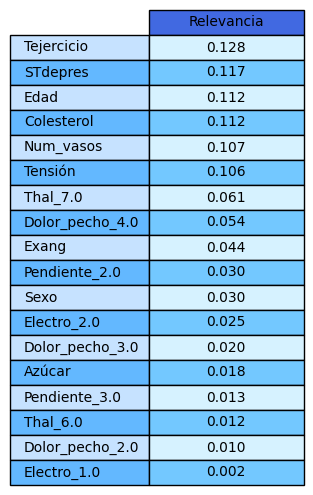

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(2, 3))
ax.axis('tight')
ax.axis('off')

celdasFormateadas = []
celdasColores =  []
cabeceraFilColor= []
colorPar=False
for fila in relevancias[indices]:
  # Formato de celdas con 3 decimales
    celdasFormateadas.append(['%1.3f' % fila])
    # Formato filas pares:
    if (colorPar == True):
      celdasColores.append(["#73C8FF"])
      cabeceraFilColor.append("#63B8FF")
    # Formato filas impares:
    else:
      celdasColores.append(["#D6F2FF"])
      cabeceraFilColor.append("#C6E2FF")
    colorPar = not(colorPar)

tabla=ax.table(cellText=celdasFormateadas, cellColours=celdasColores,
               colLabels=["Relevancia"], colColours=['royalblue'],
               rowLabels=etiquetas_rasgos[indices], rowColours=cabeceraFilColor,
               loc="center", cellLoc="center")
tabla.scale(1, 1.5)
plt.show()

Usando un **gráfico de barras**:

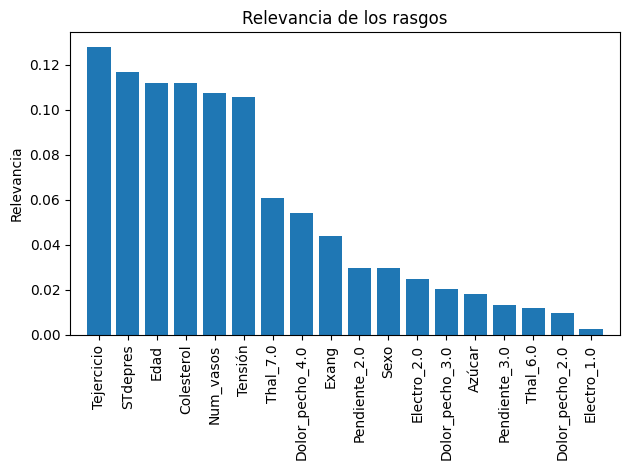

In [ ]:
plt.title('Relevancia de los rasgos')
plt.bar(range(X_ent.shape[1]),
        relevancias[indices],
        align='center')
# Mostramos etiquetas eje horizontal:
plt.xticks(range(X_ent.shape[1]),
           etiquetas_rasgos[indices], rotation=90)
plt.xlim([-1, X_ent.shape[1]])
plt.ylabel("Relevancia")
plt.tight_layout()
plt.show()

Y también mediante un **diagrama de sectores**:

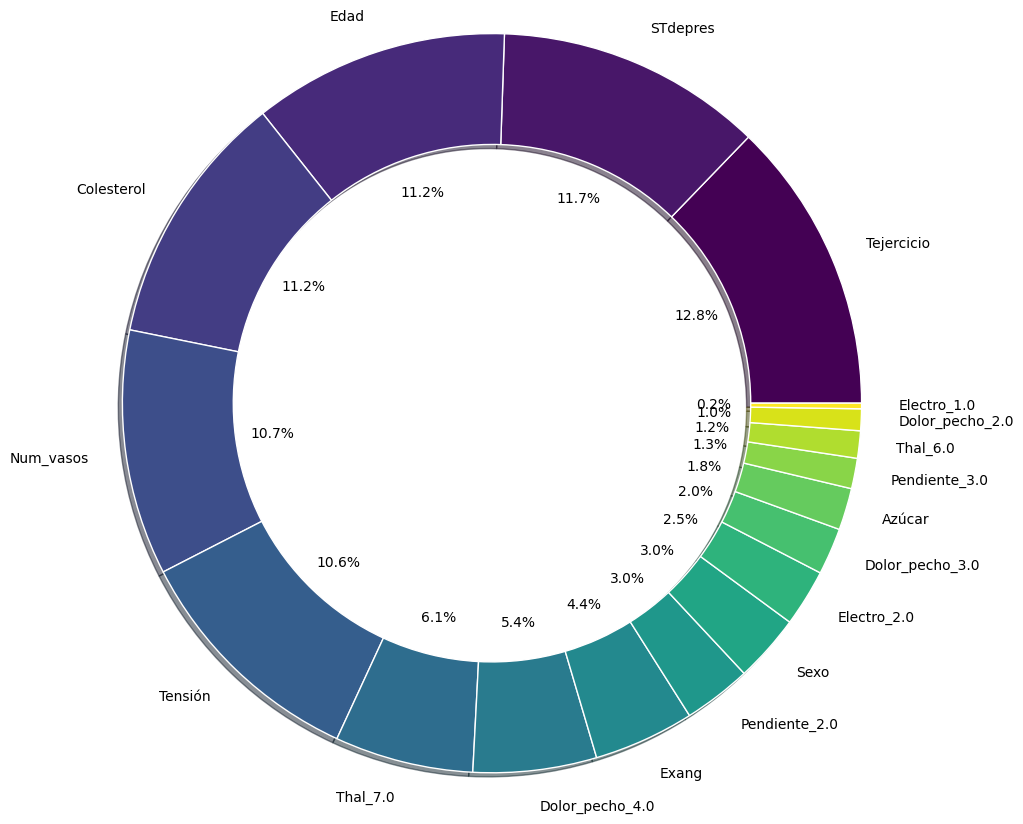

In [ ]:
# Vamos a usar un mapa de colores perceptualmente uniforme
colores = plt.get_cmap('viridis')(np.linspace(0, 1, len(etiquetas_rasgos)))

plt.pie(relevancias[indices], labels=etiquetas_rasgos[indices], colors=colores,
  radius=2.5,  wedgeprops={"width": 0.75, "linewidth": 1, "edgecolor": "white"},
  autopct='%1.1f%%', shadow=True)

plt.show()

También podemos usar directamente la biblioteca **scikit-learn** para seleccionar los rasgos a partir de un estimador:

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(bosque, threshold=0.1, prefit=True)
# Ojo, "transform" devuelve directamente la matriz de muestras con los rasgos
# cuya relevancia supera el umbral:
X_elegidos = sfm.transform(X_ent)
indicesElegidos = sfm.get_support()
print('Cantidad de rasgos que superan el umbral:', X_elegidos.shape[1])
for f in etiquetas_rasgos[indicesElegidos]:
    print("%s" % (f))

Cantidad de rasgos que superan el umbral: 6
Edad
Tensión
Colesterol
Tejercicio
STdepres
Num_vasos


Los rasgos más significativos están incluidos en los 11 más relevantes que se determinaron mediante SBS con KNN. Esta concordancia no siempre tiene que ser así, en los bosques aleatorios, si hay algún **rasgo correlado con otro**, es posible que uno de ellos tenga un valor de relevancia muy alto y los demás muy bajos. No obstante esta cuestión es irrelevante si lo que nos interesa es la capacidad de predección del modelo resultante y no la interpretación de los rasgos.